In [1]:
import os
import numpy as np
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt

os.getcwd()

'c:\\Users\\matte\\OneDrive\\Desktop\\Università\\Trieste\\Second_year\\HPC21\\Cozzini\\MPI\\Assignment1\\Jacobi\\single_core'

In [2]:
filename = 'single_core_thin.csv'
colnames = ['Maxtime [s]', 'Mintime [s]', 'JacobiMin [s]', 'JacobiMax [s]', 'Residuals', 'MLUPs']
data_frame = pd.read_csv(filename, names=colnames, header=None)
data_frame = data_frame.round(3)
data_frame
#data_frame.mean(axis=0)
#data = data_frame.values

,Maxtime [s],Mintime [s],JacobiMin [s],JacobiMax [s],Residuals,MLUPs
0,15.357,15.357,15.083,15.083,1.202000e+07,112.521
1,15.319,15.319,15.053,15.053,2.000000e+06,112.802
2,15.347,15.347,15.081,15.081,4.259259e+05,112.596
3,15.320,15.320,15.054,15.054,1.265432e+05,112.793
4,15.346,15.346,15.080,15.080,5.182613e+04,112.606
5,15.319,15.319,15.053,15.053,2.670213e+04,112.799
6,15.345,15.345,15.079,15.079,1.589400e+04,112.609
7,15.319,15.319,15.053,15.053,1.037824e+04,112.801
8,15.346,15.346,15.080,15.080,7.222263e+03,112.601
9,15.319,15.319,15.054,15.054,5.266190e+03,112.798


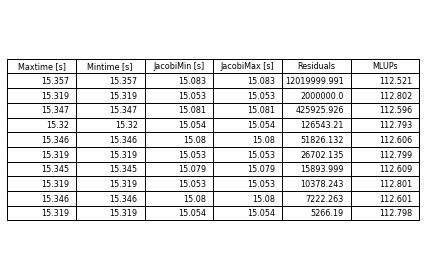

In [3]:
# creating table
fig, ax = plt.subplots()
ax.axis('off')
ax.axis('tight')
t= ax.table(cellText=data_frame.values, colWidths = [0.2]*len(data_frame.columns),  colLabels=data_frame.columns,  loc='center')
t.auto_set_font_size(False) 
t.set_fontsize(8)
fig.tight_layout()
plt.show()

In [4]:
def get_averages(filename):
    colnames = ['Maxtime [s]', 'Mintime [s]', 'JacobiMin [s]', 'JacobiMax [s]', 'Residuals', 'MLUPs']
    data_frame = pd.read_csv(filename, names=colnames, header=None)
    averages = data_frame.mean(axis=0)
    return round(averages, 3)

In [12]:
sc_thin_avg = get_averages('single_core_thin.csv')
print("Thin:\n",sc_thin_avg)
sc_gpu_avg = get_averages('single_core_gpu.csv')
print("\n\nGPU:\n",sc_gpu_avg)

Thin:
 Maxtime [s]           15.334
Mintime [s]           15.334
JacobiMin [s]         15.067
JacobiMax [s]         15.067
Residuals        1468975.809
MLUPs                112.692
dtype: float64


GPU:
 Maxtime [s]           22.314
Mintime [s]           22.314
JacobiMin [s]         21.811
JacobiMax [s]         21.811
Residuals        1468975.809
MLUPs                 77.439
dtype: float64


In [20]:
MLUPs_s_thin = sc_thin_avg['MLUPs'] / sc_thin_avg[0]
MLUPs_s_gpu = sc_gpu_avg['MLUPs'] / sc_gpu_avg[0]
print("MLUPs/s thin:", MLUPs_s_thin)
print("MLUPs/s gpu:", MLUPs_s_gpu)

MLUPs/s thin: 7.349158732229033
MLUPs/s gpu: 3.470422156493681
